In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("winequality-red.csv")

In [ ]:
X = df.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
X = df.drop(['quality','goodquality'], axis = 1) # Separate feature variables and target variable
Y = df['goodquality']

In [ ]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

In [ ]:
print(X_train.shape)

(1119, 11)


In [ ]:
y_train_cat = tf.keras.utils.to_categorical(Y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(Y_test, 6)

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential(layers = None , name = None)
ann.add(tf.keras.layers.Input(shape = 11,))
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                192       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 6)                 54        
                                                                 
Total params: 382
Trainable params: 382
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [ ]:
history = ann.fit(X_train, y_train_cat,  batch_size= 32, epochs = 75 , validation_data = (X_test,y_test_cat))

Epoch 1/75
35/35 [==============================] - 1s 4ms/step - loss: 1.6845 - accuracy: 0.3226 - val_loss: 1.5019 - val_accuracy: 0.5854
Epoch 2/75
35/35 [==============================] - 0s 2ms/step - loss: 1.3416 - accuracy: 0.7319 - val_loss: 1.1320 - val_accuracy: 0.8354
Epoch 3/75
35/35 [==============================] - 0s 2ms/step - loss: 0.9470 - accuracy: 0.8579 - val_loss: 0.7663 - val_accuracy: 0.8583
Epoch 4/75
35/35 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.8686 - val_loss: 0.5498 - val_accuracy: 0.8604
Epoch 5/75
35/35 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8740 - val_loss: 0.4454 - val_accuracy: 0.8625
Epoch 6/75
35/35 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8704 - val_loss: 0.3909 - val_accuracy: 0.8667
Epoch 7/75
35/35 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8713 - val_loss: 0.3616 - val_accuracy: 0.8646
Epoch 8/75
35/35 [==

35/35 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.9017 - val_loss: 0.2800 - val_accuracy: 0.8771
Epoch 60/75
35/35 [==============================] - 0s 1ms/step - loss: 0.2345 - accuracy: 0.8972 - val_loss: 0.2809 - val_accuracy: 0.8813
Epoch 61/75
35/35 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.8999 - val_loss: 0.2812 - val_accuracy: 0.8771
Epoch 62/75
35/35 [==============================] - 0s 1ms/step - loss: 0.2326 - accuracy: 0.9026 - val_loss: 0.2846 - val_accuracy: 0.8792
Epoch 63/75
35/35 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9035 - val_loss: 0.2839 - val_accuracy: 0.8792
Epoch 64/75
35/35 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.8999 - val_loss: 0.2849 - val_accuracy: 0.8792
Epoch 65/75
35/35 [==============================] - 0s 1ms/step - loss: 0.2308 - accuracy: 0.8990 - val_loss: 0.2856 - val_accuracy: 0.8792
Epoch 66/75
35/35 [======

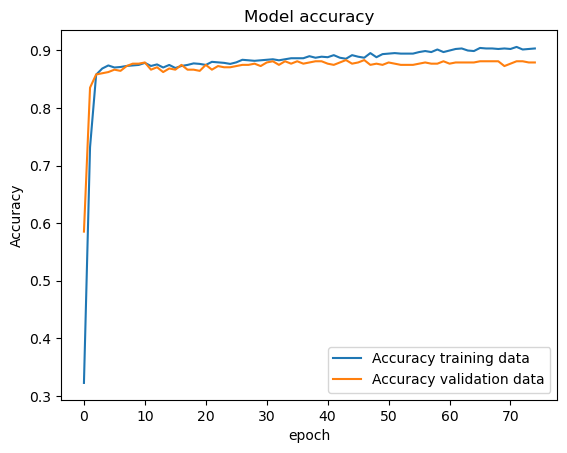

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

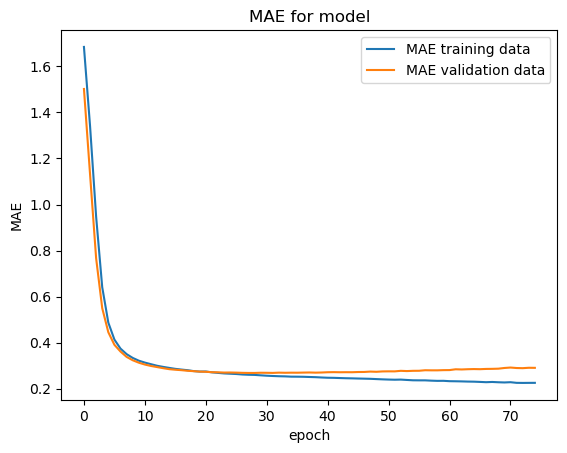

In [ ]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()